In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import os
import pathlib

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
import sklearn.linear_model as skl
import sklearn.model_selection as skm

from ISLP import confusion_table

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import os
import pathlib
from ISLP import confusion_table

In [2]:
# Load data
data = pd.read_csv(os.path.join(pathlib.Path.home(), "stat5610", "stat-5610-project", "data", "train.csv"))
x_data = np.array(data[data.columns.drop("Y")].values)
y_data = data["Y"].values

# Train/ test split
idx = list(range(len(y_data)))
train_idx, test_idx = skm.train_test_split(idx)
x_train, y_train = x_data[train_idx, :], y_data[train_idx]
x_test, y_test = x_data[test_idx, :], y_data[test_idx]

In [ ]:
clf = RandomForestClassifier(random_state=0)
parameters = {"criterion" :["gini", "entropy", "log_loss"],
              "max_depth" : list(range(5,25, 5)),
              "min_samples_split" : list(range(10, 100, 10)),
              "min_samples_leaf" : list(range(10, 100, 10)),
              "n_estimators" : list(range(100, 400, 100)),
              "max_features" :["sqrt", "log"]}

scorer = make_scorer(f1_score)
grid_search = skm.GridSearchCV(clf, parameters, scoring=scorer)
results = grid_search.fit(x_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

In [ ]:
joblib.dump(grid_search, 'grid_search_model.joblib')

In [9]:
preds = clf.predict(x_test)
f1 = f1_score(y_test, preds)
print(f"F1 Score: {f1}")
confusion_table(preds, y_test)

F1 Score: 0.6924979389942292


Truth,0,1
Predicted,,
0,24207,221
1,152,420


In [7]:
preds

array([0, 0, 0, ..., 0, 0, 0], shape=(25000,))

In [12]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_compute_oob_predictions',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimators_indices',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_params_html',
 '_html_repr',
 '_make_estimator',
 '_n_samples',
 '_n_samples_bootstrap',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_htm

In [18]:
from sklearn.tree import plot_tree

[Text(0.33066048764840467, 0.98, 'x[9] <= 0.023\ngini = 0.049\nsamples = 47623\nvalue = [73107, 1893]'),
 Text(0.04353203067029433, 0.94, 'x[0] <= 0.499\ngini = 0.279\nsamples = 1115\nvalue = [1504, 302]'),
 Text(0.1870962591593495, 0.96, 'True  '),
 Text(0.03957457333663122, 0.9, 'x[1] <= 0.29\ngini = 0.446\nsamples = 536\nvalue = [597, 302]'),
 Text(0.011872372000989364, 0.86, 'x[5] <= 0.472\ngini = 0.195\nsamples = 154\nvalue = [227, 28]'),
 Text(0.007914914667326243, 0.82, 'gini = 0.0\nsamples = 67\nvalue = [109, 0]'),
 Text(0.015829829334652486, 0.82, 'x[2] <= 0.694\ngini = 0.31\nsamples = 87\nvalue = [118, 28]'),
 Text(0.011872372000989364, 0.78, 'x[3] <= 0.392\ngini = 0.391\nsamples = 62\nvalue = [77, 28]'),
 Text(0.007914914667326243, 0.74, 'x[6] <= 0.287\ngini = 0.49\nsamples = 30\nvalue = [21, 28]'),
 Text(0.003957457333663122, 0.7, 'gini = 0.457\nsamples = 10\nvalue = [11, 6]'),
 Text(0.011872372000989364, 0.7, 'x[6] <= 0.603\ngini = 0.43\nsamples = 20\nvalue = [10, 22]'),
 

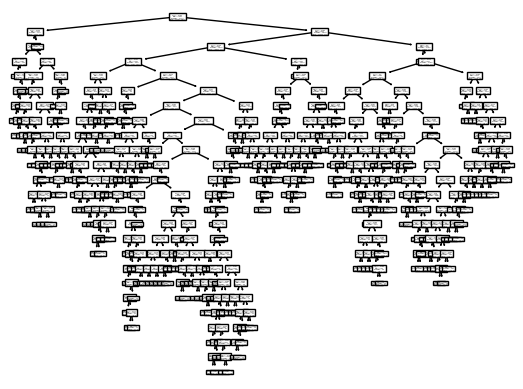

In [19]:
estimator = clf.estimators_[0]
plot_tree(estimator)

In [20]:
dir(estimator)

['_BaseDecisionTree__metadata_request__predict',
 '_DecisionTreeClassifier__metadata_request__fit',
 '_DecisionTreeClassifier__metadata_request__predict_proba',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_compute_missing_values_in_feature_mask',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params_html',
 '_html_repr',
 '_parameter_constraint

In [23]:
# estimator.get_depth()
estimator.get_n_leaves()

np.int64(299)